# **DESAFIO 3 G2** 
# **Dataset Imagenes Covid-19 - Modelo de clasificacion supervisado.**
---

<a id="section_toc"></a> 
## Tabla de Contenidos

[Intro](#section_toc)

Armado y presentacion de dataset

$\hspace{.5cm}$[Importaciones y carga de bibliotecas](#sec_imp)

$\hspace{.5cm}$[Analisis previos y observacion de variables](#sec_adv)

$\hspace{.9cm}$[Caracteristicas generales del dataset](#sec_adv_ds)

$\hspace{.9cm}$[Inspeccion de variables](#sec_adv_nc)

Implementacion de modelos de clasificacion supervisados

$\hspace{.5cm}$[Caracteristicas generales](#sec_otl)
  
$\hspace{.5cm}$[KNeighborsClassifier](#sec_outliers_target)

$\hspace{.9cm}$[Pruebas preliminares](#sec_outliers_target)

$\hspace{.9cm}$[Optimizacion de hiperparametros mediante GridSearchCV](#sec_outliers_target)

$\hspace{.9cm}$[Metricas y conclusiones](#sec_outliers_target)

$\hspace{.5cm}$[Gaussian Naive Bayes](#sec_outliers_target)

$\hspace{.9cm}$[Pruebas preliminares](#sec_outliers_target)

$\hspace{.9cm}$[Optimizacion de hiperparametros mediante GridSearchCV](#sec_outliers_target)

$\hspace{.9cm}$[Metricas y conclusiones](#sec_outliers_target)

$\hspace{.5cm}$[Logistic Regression](#sec_outliers_target)

$\hspace{.9cm}$[Pruebas preliminares](#sec_outliers_target)

$\hspace{.9cm}$[Optimizacion de hiperparametros mediante GridSearchCV](#sec_outliers_target)

$\hspace{.9cm}$[Metricas y conclusiones](#sec_outliers_target)

Automatizacion de procesos

$\hspace{.5cm}$[Pipelines](#sec_imp)

---

In [1]:
!pip install opencv-python

### Importacion de bibliotecas generales

In [2]:
import os
import sys
import re

In [3]:
import pandas as pd
import numpy as np

In [4]:
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

### Importacion de librerias para armado y testeo de modelos

In [64]:
# operaciones sobre variables
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# modelos de clasificacion
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# normalizacion de variables
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler

### Variables globales

In [6]:
# path relativo al repositorio de imagenes
this_path = os.path.dirname('.')
rel_dataset_path = '../data/xrays_dataset_completo/'

# path absoluto al repositorio de imagenes
abs_dataset_path = os.path.abspath(os.path.join(this_path, rel_dataset_path))

# path absoluto a dataset de training y a dataset testing
# photos1
photos1_dataset_path = os.path.join(abs_dataset_path, "photos1")
# photos2
photos2_dataset_path = os.path.join(abs_dataset_path, "photos2")
# photos3
photos3_dataset_path = os.path.join(abs_dataset_path, "photos3")

# expresion regular para buscar solamente imagenes
pat = '(jpeg|jpg|png)$'
reg = re.compile(pat, flags = re.IGNORECASE)

In [7]:
path_label = [path for path in os.listdir(photos1_dataset_path)]

In [8]:
print(path_label)

['Normal', 'Viral Pneumonia', 'Covid']


**Creacion de dataset a partir de repositorio de imagenes**

**Ejemplo imagenes**

**Coronavirus**

In [9]:
imcor1 = cv2.imread(rel_dataset_path + '/photos1/Covid/0100.jpeg', cv2.COLOR_BGR2GRAY)
imcor2 = cv2.imread(rel_dataset_path + '/photos1/Covid/0102.jpeg', cv2.COLOR_BGR2GRAY)
imcor3 = cv2.imread(rel_dataset_path + '/photos1/Covid/0105.png', cv2.COLOR_BGR2GRAY)
imcor4 = cv2.imread(rel_dataset_path + '/photos1/Covid/0106.jpeg', cv2.COLOR_BGR2GRAY)

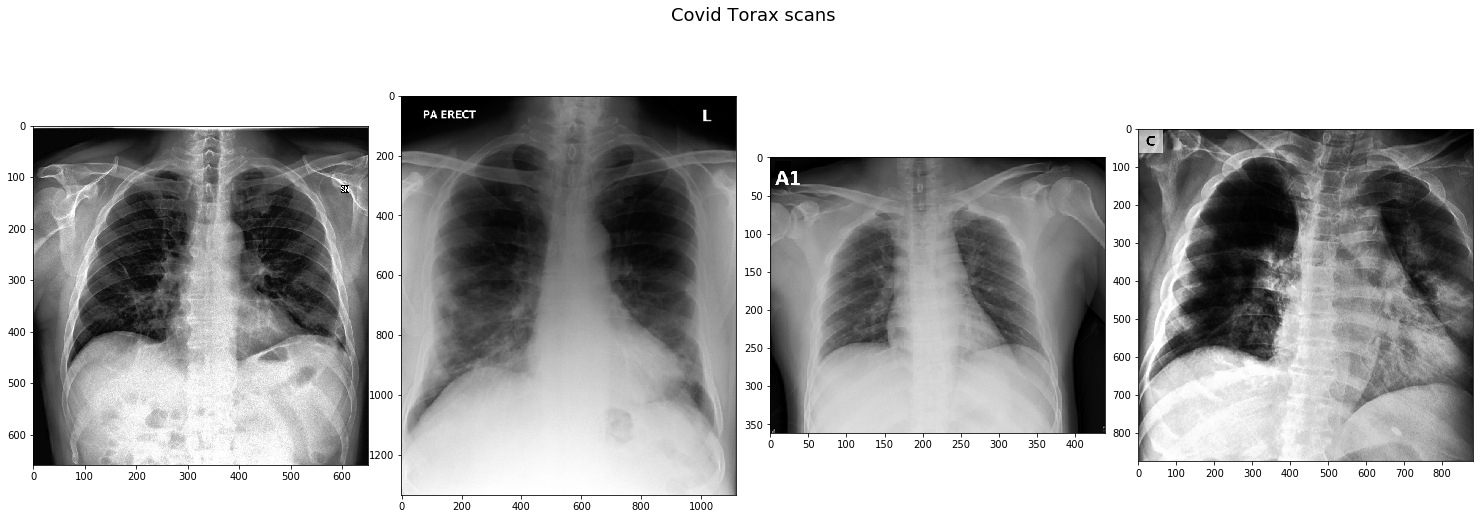

In [10]:
fig, axs = plt.subplots(1,4,figsize=(20,20))
fig.suptitle('Covid Torax scans', y=0.70, fontsize=18)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0.3)
axs[0].imshow(imcor1)
axs[1].imshow(imcor2)
axs[2].imshow(imcor3)
axs[3].imshow(imcor4)
plt.show()

**Neumonia**

In [11]:
imneu1 = cv2.imread(rel_dataset_path + '/photos1/Viral Pneumonia/0101.jpeg', cv2.COLOR_BGR2GRAY)
imneu2 = cv2.imread(rel_dataset_path + '/photos1/Viral Pneumonia/0102.jpeg', cv2.COLOR_BGR2GRAY)
imneu3 = cv2.imread(rel_dataset_path + '/photos1/Viral Pneumonia/0103.jpeg', cv2.COLOR_BGR2GRAY)
imneu4 = cv2.imread(rel_dataset_path + '/photos1/Viral Pneumonia/0104.jpeg', cv2.COLOR_BGR2GRAY)

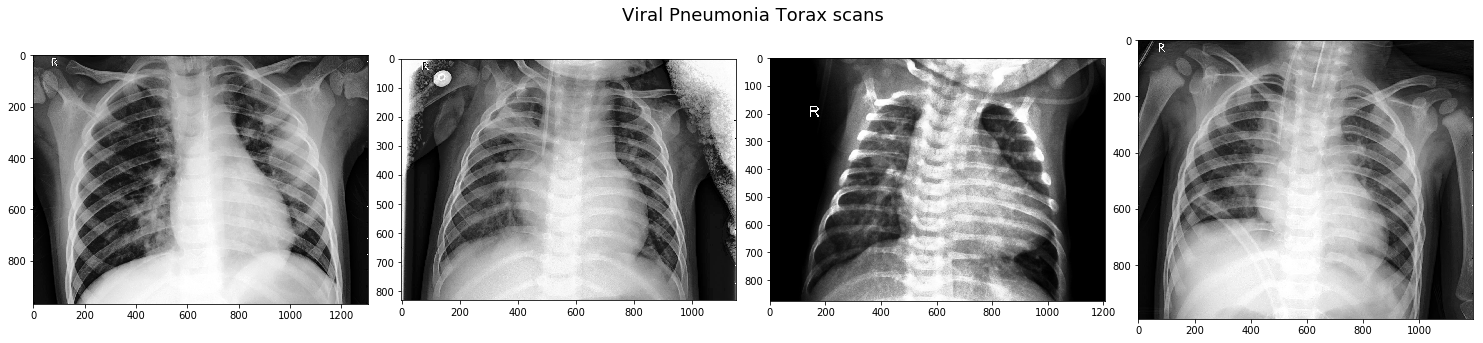

In [12]:
fig, axs = plt.subplots(1,4,figsize=(20,20))
fig.suptitle('Viral Pneumonia Torax scans', y=0.62, fontsize=18)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0.3)
axs[0].imshow(imneu1)
axs[1].imshow(imneu2)
axs[2].imshow(imneu3)
axs[3].imshow(imneu4)
plt.show()

**Normal**

In [13]:
imnor1 = cv2.imread(rel_dataset_path + '/photos1/Normal/0101.jpeg', cv2.COLOR_BGR2GRAY)
imnor2 = cv2.imread(rel_dataset_path + '/photos1/Normal/0102.jpeg', cv2.COLOR_BGR2GRAY)
imnor3 = cv2.imread(rel_dataset_path + '/photos1/Normal/0103.jpeg', cv2.COLOR_BGR2GRAY)
imnor4 = cv2.imread(rel_dataset_path + '/photos1/Normal/0105.jpeg', cv2.COLOR_BGR2GRAY)

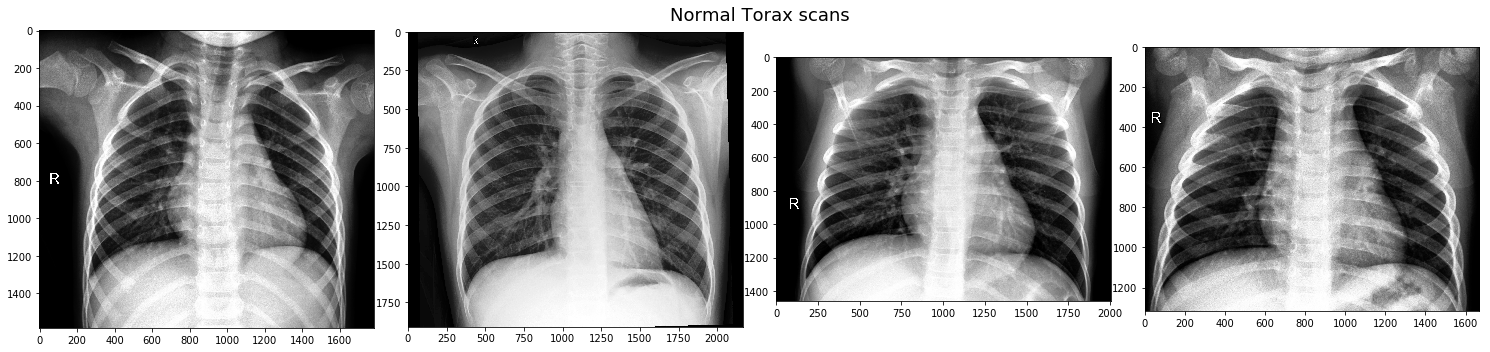

In [14]:
fig, axs = plt.subplots(1,4,figsize=(20,20))
fig.suptitle('Normal Torax scans', y=0.62, fontsize=18)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0.3)
axs[0].imshow(imnor1)
axs[1].imshow(imnor2)
axs[2].imshow(imnor3)
axs[3].imshow(imnor4)
plt.show()

## Parametros de imagen ajustados

Analisis segun las siguientes condiciones:
    
    * dimesiones 100 x 100 (10000 pixeles).
    * en escala de grises

In [15]:
imgtest = cv2.imread(rel_dataset_path + '/photos1/Covid/0100.jpeg', cv2.IMREAD_COLOR)

In [16]:
imgtest = cv2.cvtColor(imgtest, cv2.COLOR_BGR2GRAY)

In [17]:
imgtest = cv2.resize(imgtest, (100,100))

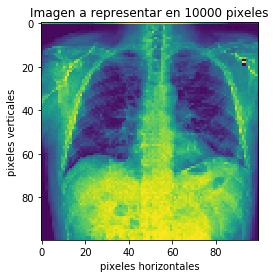

In [18]:
plt.imshow(imgtest)
plt.xlabel('pixeles horizontales')
plt.ylabel('pixeles verticales')
plt.title('Imagen a representar en 10000 pixeles')
plt.show()

In [19]:
imgtest.shape

(100, 100)

In [20]:
imgtest.flatten().shape

(10000,)

In [21]:
def new_dataset(dataset_path):
    '''
    creacion de nuevo dataset a partir de repositorio de imagenes
    dataset_path: ruta absoluta donde se encuentran las imagenes, test o train
    salida: tupla con:
        * matriz de dos dimensiones con mapa de bits de cada imagen (cada registro o lista de una dimension es una imagen) - Feature
        * lista de una dimension con valores numericos que representan la clase a la que pertenece la imagen - Target
        * lista de una dimension con las etiquetas de clase a la que pertenece cada imagen
    '''
    imgs_label = []
    imgs = []
    for pathlabel in os.listdir(dataset_path):
        label = os.path.join(dataset_path, pathlabel)
        for file in os.listdir(label):
            if re.search(pat, file) is not None:
                img = cv2.imread(os.path.join(label, file), cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (100,100))
                img = img.flatten()
                imgs.append(img)
                imgs_label.append(pathlabel)
                
    label_to_id_dict = {v:i for i,v in enumerate(np.unique(imgs_label))}
    label_ids = np.array([label_to_id_dict[x] for x in imgs_label])
    
    return np.array(imgs), label_ids, np.array(imgs_label)

**Creacion de variable target**

**Features**

In [22]:
photos1_X, photos1_y, photos1_labels = new_dataset(photos1_dataset_path)
photos2_X, photos2_y, photos2_labels = new_dataset(photos2_dataset_path)
photos3_X, photos3_y, photos3_labels = new_dataset(photos3_dataset_path)

In [23]:
photos1_X

array([[ 57,  65,  68, ...,   0,   0,   0],
       [ 20,  30,  38, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [222, 177, 180, ..., 109, 105, 100],
       [  7,   8,   8, ...,  11,  12,  30],
       [ 46,  32,  27, ...,  38,  44,  52]], dtype=uint8)

In [24]:
photos1_labels

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Viral Pneumonia', 'Viral Pneumonia',
       'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia',
       'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia',
       'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia',
       'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia',
       'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia',
       'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid'], dtype='<U15')

In [25]:
photos1_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
display(photos1_X.shape, photos1_y.shape, photos1_labels.shape)
display(photos2_X.shape, photos2_y.shape, photos2_labels.shape)
display(photos3_X.shape, photos3_y.shape, photos3_labels.shape)

(66, 10000)

(66,)

(66,)

(251, 10000)

(251,)

(251,)

(353, 10000)

(353,)

(353,)

---

## Features y target como objetos de pandas

### Preparacion del dataset

Unificacion de set de train y testing para aplicar una estrategia de separacion a traves de los metodos de scikit learn. Se busca mantener la proporcionalidad de la clases de la variable target.

In [30]:
photos1_X, photos1_y, photos1_labels = new_dataset(photos1_dataset_path)
photos2_X, photos2_y, photos2_labels = new_dataset(photos2_dataset_path)
photos3_X, photos3_y, photos3_labels = new_dataset(photos3_dataset_path)

In [31]:
numpy_append = np.append(photos1_X, photos2_X, axis=0)
data_features = pd.DataFrame(np.append(numpy_append, photos3_X, axis=0))

In [32]:
data_features

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,57,65,68,64,65,69,70,63,56,52,...,123,116,61,24,8,2,0,0,0,0
1,20,30,38,85,110,116,145,116,122,115,...,121,107,80,151,129,77,12,0,0,0
2,0,0,0,139,143,196,178,172,169,168,...,48,27,2,7,13,21,21,0,0,0
3,0,0,0,42,32,34,44,46,53,182,...,135,102,175,178,163,252,255,0,0,0
4,0,0,0,0,99,109,115,119,127,174,...,34,23,2,5,8,9,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,16,9,6,5,4,3,9,12,12,16,...,108,101,89,72,66,57,39,5,3,16
666,7,8,8,8,7,7,7,6,6,5,...,36,28,2,2,5,8,10,11,12,30
667,46,32,27,253,225,237,238,96,41,42,...,76,56,28,30,33,36,37,38,44,52
668,1,0,0,0,0,1,1,1,1,1,...,177,169,132,63,16,2,0,0,0,1


In [33]:
numpy_append = np.append(photos1_y, photos2_y, axis=0)
data_target = pd.Series(np.append(numpy_append, photos3_y, axis=0))

In [34]:
data_features.shape, data_target.shape

((670, 10000), (670,))

**Armado de sets de test y train**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, stratify=data_target, random_state=0)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((502, 10000), (168, 10000), (502,), (168,))

In [37]:
y_train.value_counts(normalize=True)

1    0.344622
0    0.342629
2    0.312749
dtype: float64

In [38]:
y_test.value_counts(normalize=True)

1    0.345238
0    0.339286
2    0.315476
dtype: float64

---

### Lo mismo pero estandarizando las variables

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
X_train

array([[-0.66690934, -0.71881193, -0.76340804, ...,  1.15605401,
         1.12987377,  0.96064689],
       [-0.40201509, -0.45415297, -0.49679943, ..., -0.35070468,
        -0.32447657, -0.31378424],
       [-0.34525204, -0.3407277 , -0.42062554, ..., -0.35070468,
        -0.2543874 , -0.20454728],
       ...,
       [ 0.79000903,  0.68009972,  0.70293933, ...,  1.69780994,
         1.79572091,  1.7070994 ],
       [-0.49662018, -0.54867402, -0.59201679, ..., -0.41842417,
        -0.39456574, -0.40481503],
       [-0.59122527,  2.62723349, -0.76340804, ...,  1.68088007,
         2.3213897 ,  0.57831755]])

In [41]:
# Verificamos que las variables ahora tengan media 0 y desvío 1.
print('Medias:', np.mean(X_train, axis=0).round(2))
print('Desvio:', np.std(X_train, axis=0).round(2))

Medias: [ 0. -0. -0. ... -0. -0.  0.]
Desvio: [1. 1. 1. ... 1. 1. 1.]


In [42]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [43]:
# Calculamos nuevamente los scores de cross validation,
# pero esta vez sobre los features estandarizados:

scores_para_df_standard = []

for i in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(model, X_train, y_train, cv=skf)
    dict_row_score = {'score_medio':np.mean(cv_scores),
                      'score_std':np.std(cv_scores), 'n_neighbors':i}
    scores_para_df_standard.append(dict_row_score)

In [44]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_knn_scores_standard = pd.DataFrame(scores_para_df_standard)
df_knn_scores_standard.sort_values(by='score_medio', ascending=False).head(5)

,score_medio,score_std,n_neighbors
8,0.868535,0.029180,9
2,0.866475,0.042720,3
0,0.864535,0.035910,1
9,0.860594,0.027361,10
10,0.860554,0.017813,11


In [45]:
# Armamos nuevamente los límites para graficar
df_knn_scores_standard['limite_superior'] = df_knn_scores_standard['score_medio'] + df_knn_scores_standard['score_std']
df_knn_scores_standard['limite_inferior'] = df_knn_scores_standard['score_medio'] - df_knn_scores_standard['score_std']
df_knn_scores_standard.sort_values(by='score_medio', ascending=False).head(5)

,score_medio,score_std,n_neighbors,limite_superior,limite_inferior
8,0.868535,0.029180,9,0.897714,0.839355
2,0.866475,0.042720,3,0.909196,0.823755
0,0.864535,0.035910,1,0.900445,0.828625
9,0.860594,0.027361,10,0.887955,0.833233
10,0.860554,0.017813,11,0.878368,0.842741


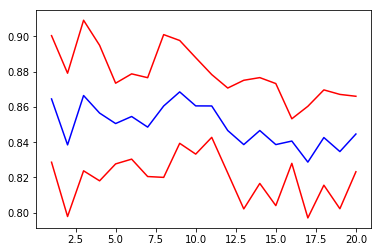

In [46]:
# Graficamos los resultados
plt.plot(df_knn_scores_standard['n_neighbors'], df_knn_scores_standard['limite_inferior'], color='r')
plt.plot(df_knn_scores_standard['n_neighbors'], df_knn_scores_standard['score_medio'], color='b')
plt.plot(df_knn_scores_standard['n_neighbors'], df_knn_scores_standard['limite_superior'], color='r');

In [47]:
# Identificamos el score máximo
df_knn_scores_standard.loc[df_knn_scores_standard.score_medio == df_knn_scores_standard.score_medio.max()]

,score_medio,score_std,n_neighbors,limite_superior,limite_inferior
8,0.868535,0.02918,9,0.897714,0.839355


Si bien el valor de _k_ óptimo vuelve a ser el mismo que antes, notamos que el _score_ promedio de la validación cruzada es varios puntos más alto que el que habíamos alcanzado sin la estandarización de las variables.

Ahora que decidimos cuál es el mejor preprocesamiento y el mejor valor posible para el hiperparámetro `n_neighbors`, podemos reentrenar el modelo y evaluar los resultados sobre _test_.

In [48]:
# Asignamos el valor del k óptimo a una variable
best_k = df_knn_scores_standard.loc[df_knn_scores_standard.score_medio == df_knn_scores_standard.score_medio.max(), 'n_neighbors'].values[0:2]
best_k

array([9])

In [49]:
# Elegimos el modelo óptimo de acuerdo a las pruebas de cross validation
model = KNeighborsClassifier(n_neighbors=best_k[0])

# Lo ajustamos sobre los datos de entrenamiento
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [50]:
# Evaluamos qué accuracy obtenemos en train
accuracy_score(y_train, model.predict(X_train)).round(2)

0.89

En línea con los resultados que habíamos durante las pruebas de validación cruzada, nuestro KNN está alcanzando un _accuracy score_ del orden del 97% sobre los datos de entrenamiento. Veamos si es capaz de generalizar sobre el conjunto de testeo con una _performance_ similar.

In [51]:
# Lo utilizamos para predecir en test
#X_test = scaler.transform(X_test) # ¡Importantísimo estandarizar también los datos de test con las medias y desvíos aprendidos en train!
y_pred = model.predict(X_test)

In [52]:
# Evaluamos el accuracy del modelo en test
accuracy_score(y_test, y_pred).round(2)

0.88

In [53]:
# Obtenemos la matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[54,  2,  1],
       [ 4, 45,  9],
       [ 0,  4, 49]])

Matriz de confusión

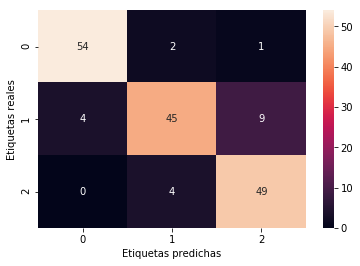

In [54]:
# Graficamos la matriz de confusión para visualizarla mejor
sns.heatmap(cm, annot=True)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

In [55]:
y_test.shape

(168,)

## Uso de gridseach

Seleccion de parametros del modelo.
Se puede probar otra metrica de evaluacion de ser necesario. Por ejemplo recall o precision

In [56]:
k_range = list(range(1, 31))
weight_opt = ['uniform', 'distance']
metric_opt = ['manhattan', 'minkowski']

Creacion de la grilla de hiperparametros del modelo

In [57]:
param_grid = dict(n_neighbors=k_range, weights=weight_opt, metric=metric_opt)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance'], 'metric': ['manhattan', 'minkowski']}


In [58]:
grid = GridSearchCV(knn, param_grid, cv=skf, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [59]:
pd.DataFrame(grid.cv_results_).sort_values(by='mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.149783,0.007047,0.655377,0.031384,manhattan,4,distance,"{'metric': 'manhattan', 'n_neighbors': 4, 'wei...",0.891089,0.841584,0.93,0.91,0.86,0.886535,0.032203,1
11,0.143470,0.001547,0.624152,0.007006,manhattan,6,distance,"{'metric': 'manhattan', 'n_neighbors': 6, 'wei...",0.871287,0.861386,0.90,0.88,0.89,0.880535,0.013572,2
6,0.149371,0.005703,0.661990,0.040073,manhattan,4,uniform,"{'metric': 'manhattan', 'n_neighbors': 4, 'wei...",0.881188,0.871287,0.92,0.87,0.84,0.876495,0.025752,3
15,0.142770,0.001528,0.626142,0.003175,manhattan,8,distance,"{'metric': 'manhattan', 'n_neighbors': 8, 'wei...",0.891089,0.861386,0.89,0.87,0.87,0.876495,0.011900,4
14,0.145848,0.003740,0.639573,0.013116,manhattan,8,uniform,"{'metric': 'manhattan', 'n_neighbors': 8, 'wei...",0.881188,0.881188,0.87,0.89,0.86,0.876475,0.010399,5


In [60]:
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')
0.8865346534653465
{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}


In [61]:
y_pred_grid = grid.predict(X_test)

In [62]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        57
           1       0.90      0.81      0.85        58
           2       0.81      0.91      0.86        53

    accuracy                           0.90       168
   macro avg       0.90      0.90      0.90       168
weighted avg       0.90      0.90      0.90       168



In [63]:
confusion = confusion_matrix(y_test, y_pred_grid)
print(confusion)

[[56  0  1]
 [ 1 47 10]
 [ 0  5 48]]
